# Libraries

In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import statsmodels.api as sm
import statistics as sts
import os
import numpy as np

os.chdir('/content/drive/MyDrive/macro 1 2023.2/lista 2 - macro 1 - dados macroeconômicos/lista 2 - macro 1 - dados macroeconômicos')

# Def

In [2]:
def plot_tendencia(DataFrame,colunas, title):
    plt.figure(figsize = (16,10))
    DataFrame[colunas].plot()
    plt.tight_layout()
    plt.xlabel('')
    plt.gcf().autofmt_xdate()
    plt.title('Taxa de desocupação {} e serie de tendência (2012-2023)'.format(title), fontsize=15)
    plt.show()

def plot_bra_usa(DataFrame,colunas):
    plt.figure(figsize = (14,10))
    DataFrame[colunas].plot()
    plt.tight_layout()
    plt.xlabel('')
    plt.gcf().autofmt_xdate()
    plt.title('Tendencia da Taxa de Desocupação BRAxUSA (2012-2023)', fontsize=15)
    plt.show()

# Filtro HP e plotagem da taxa de desocupação do brasil

In [3]:
#arquivo csv coletado no SIDRA/IBGE
desocup = pd.read_csv('desocupacao.csv', sep=';', decimal = ',' )
desocup = desocup.dropna()
desocup = desocup.set_index('trimestre')

ciclo_bra, tendencia_bra = sm.tsa.filters.hpfilter(desocup["taxa"])

desocup['tendencia_bra'] = tendencia_bra

<Figure size 1600x1000 with 0 Axes>

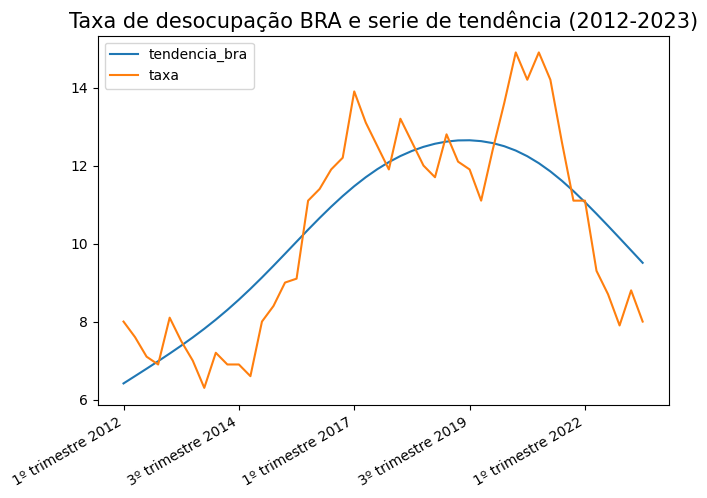

In [4]:
plot_tendencia(desocup, ['tendencia_bra','taxa'],'BRA')

# Taxa de desocupação estadunidense

In [5]:
#arquivo csv coletado no site do FED
unemploy_usa = pd.read_csv('UNRATE.csv')
unemploy_usa['DATE'] = pd.to_datetime(unemploy_usa['DATE'])

selecao = (unemploy_usa['DATE'] >= '2012-02-01') & (unemploy_usa['DATE'] <= '2023-07-30')
unemploy_usa_filtrado = unemploy_usa[selecao]

mes = len(unemploy_usa_filtrado['DATE'])
rate_list = unemploy_usa_filtrado['UNRATE'].tolist()

In [6]:
#laço for para tornar os dados mensais em trimestrais
trimestrado = []
for i in range(0,mes,3):
    media_tri = round(sts.mean(rate_list[i:i+3]),2)
    trimestrado.append(media_tri)

data = desocup.index.tolist()
unemploy_selecionado_usa = pd.DataFrame({'taxa': trimestrado}, index = data)

In [7]:
ciclo_usa, tendencia_usa = sm.tsa.filters.hpfilter(unemploy_selecionado_usa["taxa"])

unemploy_selecionado_usa['tendencia_usa'] = tendencia_usa

<Figure size 1600x1000 with 0 Axes>

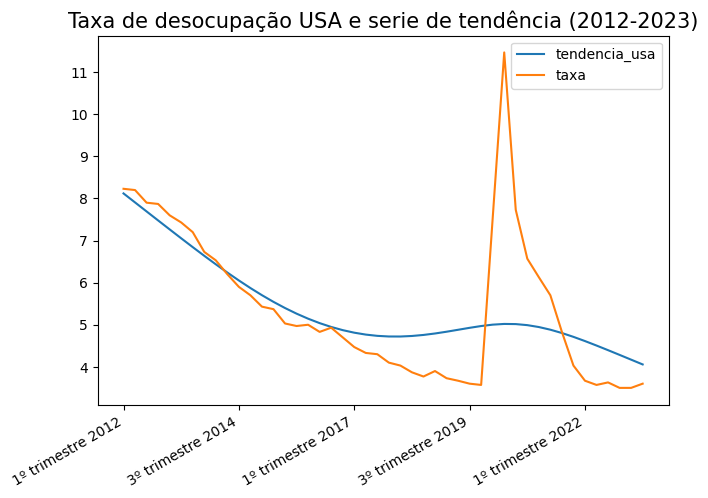

In [8]:
plot_tendencia(unemploy_selecionado_usa, ['tendencia_usa','taxa'], 'USA')

# Comparação entre as duas séries de tendência

In [13]:
bra = desocup['tendencia_bra'].tolist()
usa = unemploy_selecionado_usa['tendencia_usa'].tolist()

tendencias = pd.DataFrame({'tendencia_bra': bra,
                           'tendencia_usa': usa,
                           'data': data})
tendencias = tendencias.set_index('data')

# plot_bra_usa(tendencias,['tendencia_bra','tendencia_usa'])

np.std(bra)

1.9700710155998828